In [1]:
!git checkout main

fatal: not a git repository (or any of the parent directories): .git


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omarhanyy/imdb-top-1000")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-top-1000


In [2]:
import pandas as pd
import numpy as np
import os

# 2) 다운로드된 파일 목록 확인
print(os.listdir(path))

# 3) CSV 파일 읽기 (파일명이 imdb_top_1000.csv 일 가능성이 큼)
csv_file = os.path.join(path, "IMDB top 1000.csv")
df = pd.read_csv(csv_file)

# 4) DataFrame 출력
display(df.head())

['IMDB top 1000.csv']


,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


### 특성(컬럼) 출력

In [4]:
# 컬럼명만 출력
print(df.columns.tolist())

['Unnamed: 0', 'Title', 'Certificate', 'Duration', 'Genre', 'Rate', 'Metascore', 'Description', 'Cast', 'Info']


### 연도(Released_Year) 특성 생성

In [5]:
# Title에서 연도 추출 (정규표현식: 괄호 안 4자리 숫자)
df["Released_Year"] = df["Title"].astype(str).str.extract(r"\((\d{4})\)")
# 숫자형으로 변환
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
# 확인 ( Title, Released_Year 만 10개 출력해서 확인)
print(df[["Title", "Released_Year"]].head(10))

                                               Title  Released_Year
0                 1. The Shawshank Redemption (1994)           1994
1                            2. The Godfather (1972)           1972
2                          3. The Dark Knight (2008)           2008
3                   4. The Godfather: Part II (1974)           1974
4  5. The Lord of the Rings: The Return of the Ki...           2003
5                             6. Pulp Fiction (1994)           1994
6                         7. Schindler's List (1993)           1993
7                             8. 12 Angry Men (1957)           1957
8                                9. Inception (2010)           2010
9                              10. Fight Club (1999)           1999


### 3.2.1 기초 통계 / 기술 통계

#### 1.시기 특성 만들기 ( 시기 = 10년 )

In [6]:
# Decade 컬럼 생성 (10년 단위)
# 1975의 경우: 1975//10 -> 197, 197*10 -> 1970
df["Decade"] = (df["Released_Year"] // 10) * 10
# 확인
display(df[["Title", "Released_Year", "Decade"]].head(15))

,Title,Released_Year,Decade
0,1. The Shawshank Redemption (1994),1994,1990
1,2. The Godfather (1972),1972,1970
2,3. The Dark Knight (2008),2008,2000
3,4. The Godfather: Part II (1974),1974,1970
4,5. The Lord of the Rings: The Return of the Ki...,2003,2000
5,6. Pulp Fiction (1994),1994,1990
6,7. Schindler's List (1993),1993,1990
7,8. 12 Angry Men (1957),1957,1950
8,9. Inception (2010),2010,2010
9,10. Fight Club (1999),1999,1990


#### 2.장르 분리하기
1. 장르 특성을 리스트로 변환 "Drama, Crime" → ["Drama", "Crime"]
2. 리스트로 변환된 형태를 explode("Genre")를 써서 행으로 풀어서 늘려줌
```python
Title                  Genre
Inception (2010)       ["Action", "Sci-Fi"]
```
explode 하면 아래와 같이 변환
```python
Title                  Genre
Inception (2010)       Action
Inception (2010)       Sci-Fi
```
한 영화가 여러 개 장르를 가질 때, 각각의 장르로 따로 계산할 수 있게 함

In [7]:
# 장르 분리 (여러 장르가 들어가 있으므로 explode)
df["Genre"] = df["Genre"].str.split(", ")
df = df.explode("Genre")
display(df[["Title", "Genre"]])

,Title,Genre
0,1. The Shawshank Redemption (1994),Drama
1,2. The Godfather (1972),Crime
1,2. The Godfather (1972),Drama
2,3. The Dark Knight (2008),Action
2,3. The Dark Knight (2008),Crime
...,...,...
997,400. JFK (1991),History
997,400. JFK (1991),Thriller
998,301. Nights of Cabiria (1957),Drama
999,302. Throne of Blood (1957),Drama


#### 3.Info 컬럼에서 관객 수(Votes) 추출 (숫자만 뽑기)


In [8]:
df["Audience"] = df["Info"].str.extract(r"(\d[\d,]*)")   # 예: "2,345,678"
df["Audience"] = df["Audience"].str.replace(",", "")      # 콤마 제거
df["Audience"] = pd.to_numeric(df["Audience"], errors="coerce")
# display(df)
# Decade × Genre별 평균 관객 수
# audience_by_decade_genre = df.groupby(["Decade", "Genre"])["Audience"].mean().reset_index()
# display(audience_by_decade_genre)

#### 4.Info 컬럼에서 흥행 수익(Gross) 추출

In [9]:
# (예: "$123,456,789" → 123456789)
df["Gross"] = df["Info"].str.extract(r"\$([\d,]+)")
df["Gross"] = df["Gross"].str.replace(",", "", regex=True)
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

#### 5.계층형 인덱스(멀티 인덱스) 해제: 시기별 각 장르의 평균 평점 및 영화 숫자 파악
- Pandas를 활용한 추가 분석/시각화를 위해 일반 인덱스로 변환( 계층형 인덱스를 해제 )

In [10]:
# Decade × Genre별 평균 Rate 계산
result = df.groupby(["Decade", "Genre"]).agg(
    Avg_Rate=("Rate", "mean"),
    Avg_Audience = ("Audience", "mean"),
    Avg_Gross=("Gross", "mean"),
    Count=("Rate", "size")
).reset_index()
# 확인
display(result.head(30))

,Decade,Genre,Avg_Rate,Avg_Audience,Avg_Gross,Count
0,1920,Action,8.112500,74584.125000,0.875000,8
1,1920,Adventure,8.112500,81864.500000,1.500000,8
2,1920,Biography,8.100000,46359.000000,0.000000,7
3,1920,Comedy,8.123529,59142.588235,1.700000,17
4,1920,Drama,8.129412,59735.470588,0.647059,17
5,1920,Family,8.300000,110513.000000,5.000000,1
6,1920,Fantasy,8.100000,56194.000000,NaN,7
7,1920,History,8.100000,46359.000000,0.000000,7
8,1920,Horror,8.100000,56194.000000,NaN,7
9,1920,Mystery,8.100000,56194.000000,NaN,7


# 결과물 추출하기: 1920년대만 필터링

In [11]:
rate_1920s = result[result["Decade"] == 1920]
display(rate_1920s)

,Decade,Genre,Avg_Rate,Avg_Audience,Avg_Gross,Count
0,1920,Action,8.112500,74584.125000,0.875000,8
1,1920,Adventure,8.112500,81864.500000,1.500000,8
2,1920,Biography,8.100000,46359.000000,0.000000,7
3,1920,Comedy,8.123529,59142.588235,1.700000,17
4,1920,Drama,8.129412,59735.470588,0.647059,17
5,1920,Family,8.300000,110513.000000,5.000000,1
6,1920,Fantasy,8.100000,56194.000000,NaN,7
7,1920,History,8.100000,46359.000000,0.000000,7
8,1920,Horror,8.100000,56194.000000,NaN,7
9,1920,Mystery,8.100000,56194.000000,NaN,7


### 시각화 하기

#### 1.시기별 평균 특성 시각화

In [12]:
!apt -y install fonts-nanum > /dev/null

# 2) Matplotlib에 폰트 등록 + 한글/마이너스 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

# 설치된 나눔고딕 경로 탐색 후 등록
nanum_dir = "/usr/share/fonts/truetype/nanum"
for f in fm.findSystemFonts(fontpaths=[nanum_dir]):
    fm.fontManager.addfont(f)

plt.rcParams["font.family"] = "NanumGothic"   # 또는 "NanumBarunGothic"
mpl.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 깨짐 방지



# 시기별 전체 평균 (장르 구분 없이)
decade_avg = result.groupby("Decade").agg(
    Avg_Rate=("Avg_Rate", "mean"),
    Avg_Audience=("Avg_Audience", "mean"),
    Avg_Gross=("Avg_Gross", "mean")
).reset_index()
decade_avg = decade_avg[decade_avg["Decade"] < 2020]

- 위에서 2020년대 제외시킨 이유, 영화가 1개임.

In [13]:
df_2020s = df[df["Decade"] == 2020]
display(df_2020s[["Title", "Rate", "Audience", "Gross"]])
print(f'\n2020년대 영화 개수: {df_2020s.shape[0]}')

,Title,Rate,Audience,Gross
13,14. Hamilton (2020),8.7,44141,NaN
13,14. Hamilton (2020),8.7,44141,NaN
13,14. Hamilton (2020),8.7,44141,NaN



2020년대 영화 개수: 3


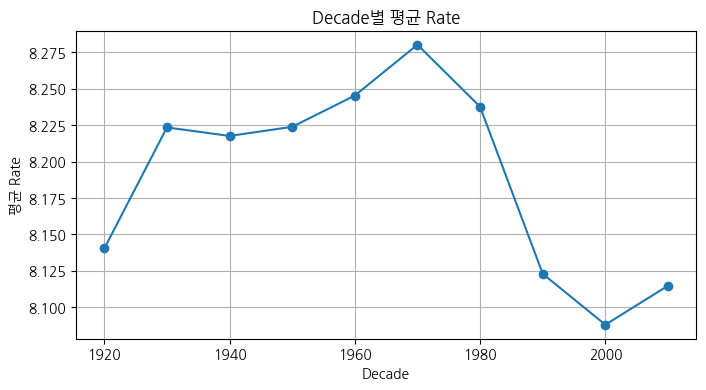

In [14]:
# 1) 평균 Rate
plt.figure(figsize=(8,4))
plt.plot(decade_avg["Decade"], decade_avg["Avg_Rate"], marker="o")
plt.title("Decade별 평균 Rate")
plt.xlabel("Decade")
plt.ylabel("평균 Rate")
plt.grid(True)
plt.show()

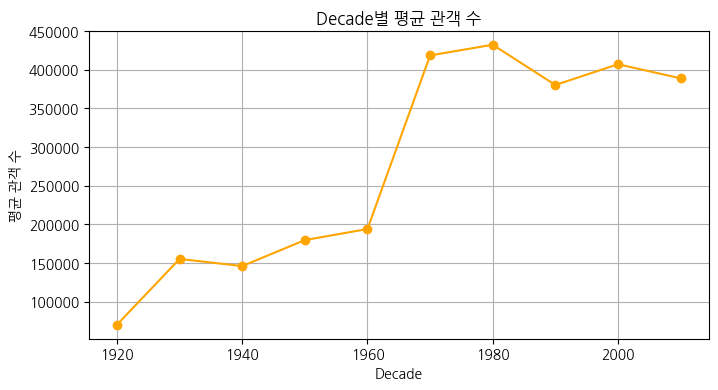

In [15]:
# 2) 평균 Audience
plt.figure(figsize=(8,4))
plt.plot(decade_avg["Decade"], decade_avg["Avg_Audience"], marker="o", color="orange")
plt.title("Decade별 평균 관객 수")
plt.xlabel("Decade")
plt.ylabel("평균 관객 수")
plt.grid(True)
plt.show()

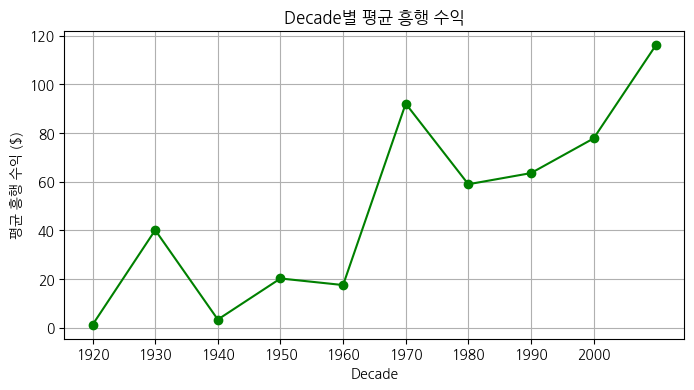

In [16]:
# 3) 평균 Gross
plt.figure(figsize=(8,4))
plt.plot(decade_avg["Decade"], decade_avg["Avg_Gross"], marker="o", color="green")
plt.title("Decade별 평균 흥행 수익")
plt.xticks(np.arange(decade_avg["Decade"].min(), decade_avg["Decade"].max(), 10))
plt.xlabel("Decade")
plt.ylabel("평균 흥행 수익 ($)")
plt.grid(True)
plt.show()

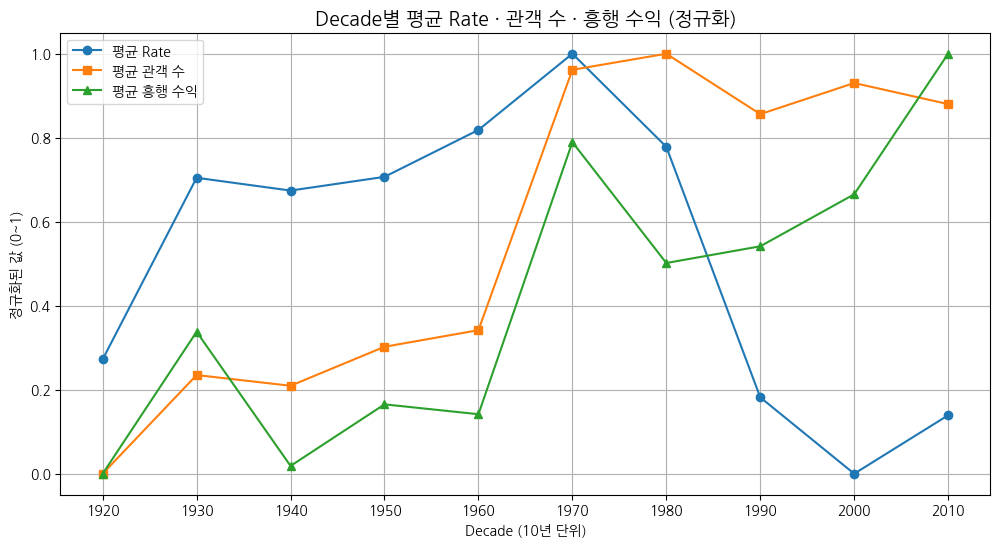

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Min-Max 정규화 함수
def minmax_norm(series):
    return (series - series.min()) / (series.max() - series.min())

# 정규화 적용
decade_avg["Rate_norm"] = minmax_norm(decade_avg["Avg_Rate"])
decade_avg["Audience_norm"] = minmax_norm(decade_avg["Avg_Audience"])
decade_avg["Gross_norm"] = minmax_norm(decade_avg["Avg_Gross"])

# 그래프
plt.figure(figsize=(12,6))
plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"], marker="o", label="평균 Rate")
plt.plot(decade_avg["Decade"], decade_avg["Audience_norm"], marker="s", label="평균 관객 수")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"], marker="^", label="평균 흥행 수익")

plt.xticks(np.arange(decade_avg["Decade"].min(), decade_avg["Decade"].max()+10, 10))
plt.title("Decade별 평균 Rate · 관객 수 · 흥행 수익 (정규화)", fontsize=14)
plt.xlabel("Decade (10년 단위)")
plt.ylabel("정규화된 값 (0~1)")
plt.legend()
plt.grid(True)
plt.show()


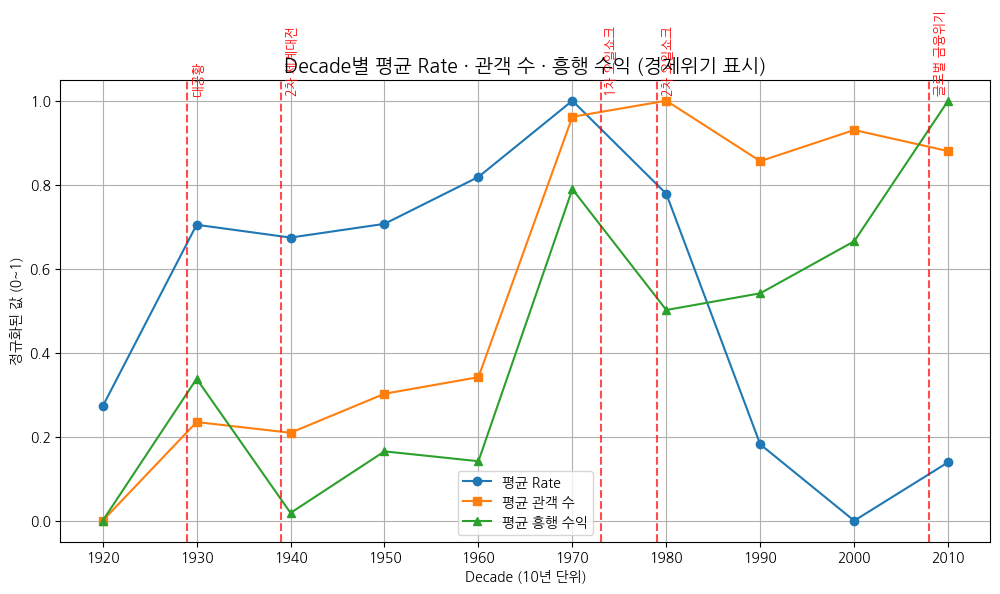

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프
plt.figure(figsize=(12,6))
plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"], marker="o", label="평균 Rate")
plt.plot(decade_avg["Decade"], decade_avg["Audience_norm"], marker="s", label="평균 관객 수")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"], marker="^", label="평균 흥행 수익")

plt.xticks(np.arange(decade_avg["Decade"].min(), decade_avg["Decade"].max()+10, 10))
plt.title("Decade별 평균 Rate · 관객 수 · 흥행 수익 (경제위기 표시)", fontsize=14)
plt.xlabel("Decade (10년 단위)")
plt.ylabel("정규화된 값 (0~1)")
plt.legend()
plt.grid(True)

# 📌 주요 경제위기 연도 (대표적인 몇 개)
crisis_years = {
    1929: "대공황",
    1939: "2차 세계대전",
    1973: "1차 오일쇼크",
    1979: "2차 오일쇼크",
    2008: "글로벌 금융위기",
}

# 수직선 추가
for year, label in crisis_years.items():
    plt.axvline(x=year, color="red", linestyle="--", alpha=0.7)
    plt.text(year+0.5, 1.02, label, rotation=90, color="red", fontsize=9)

plt.show()


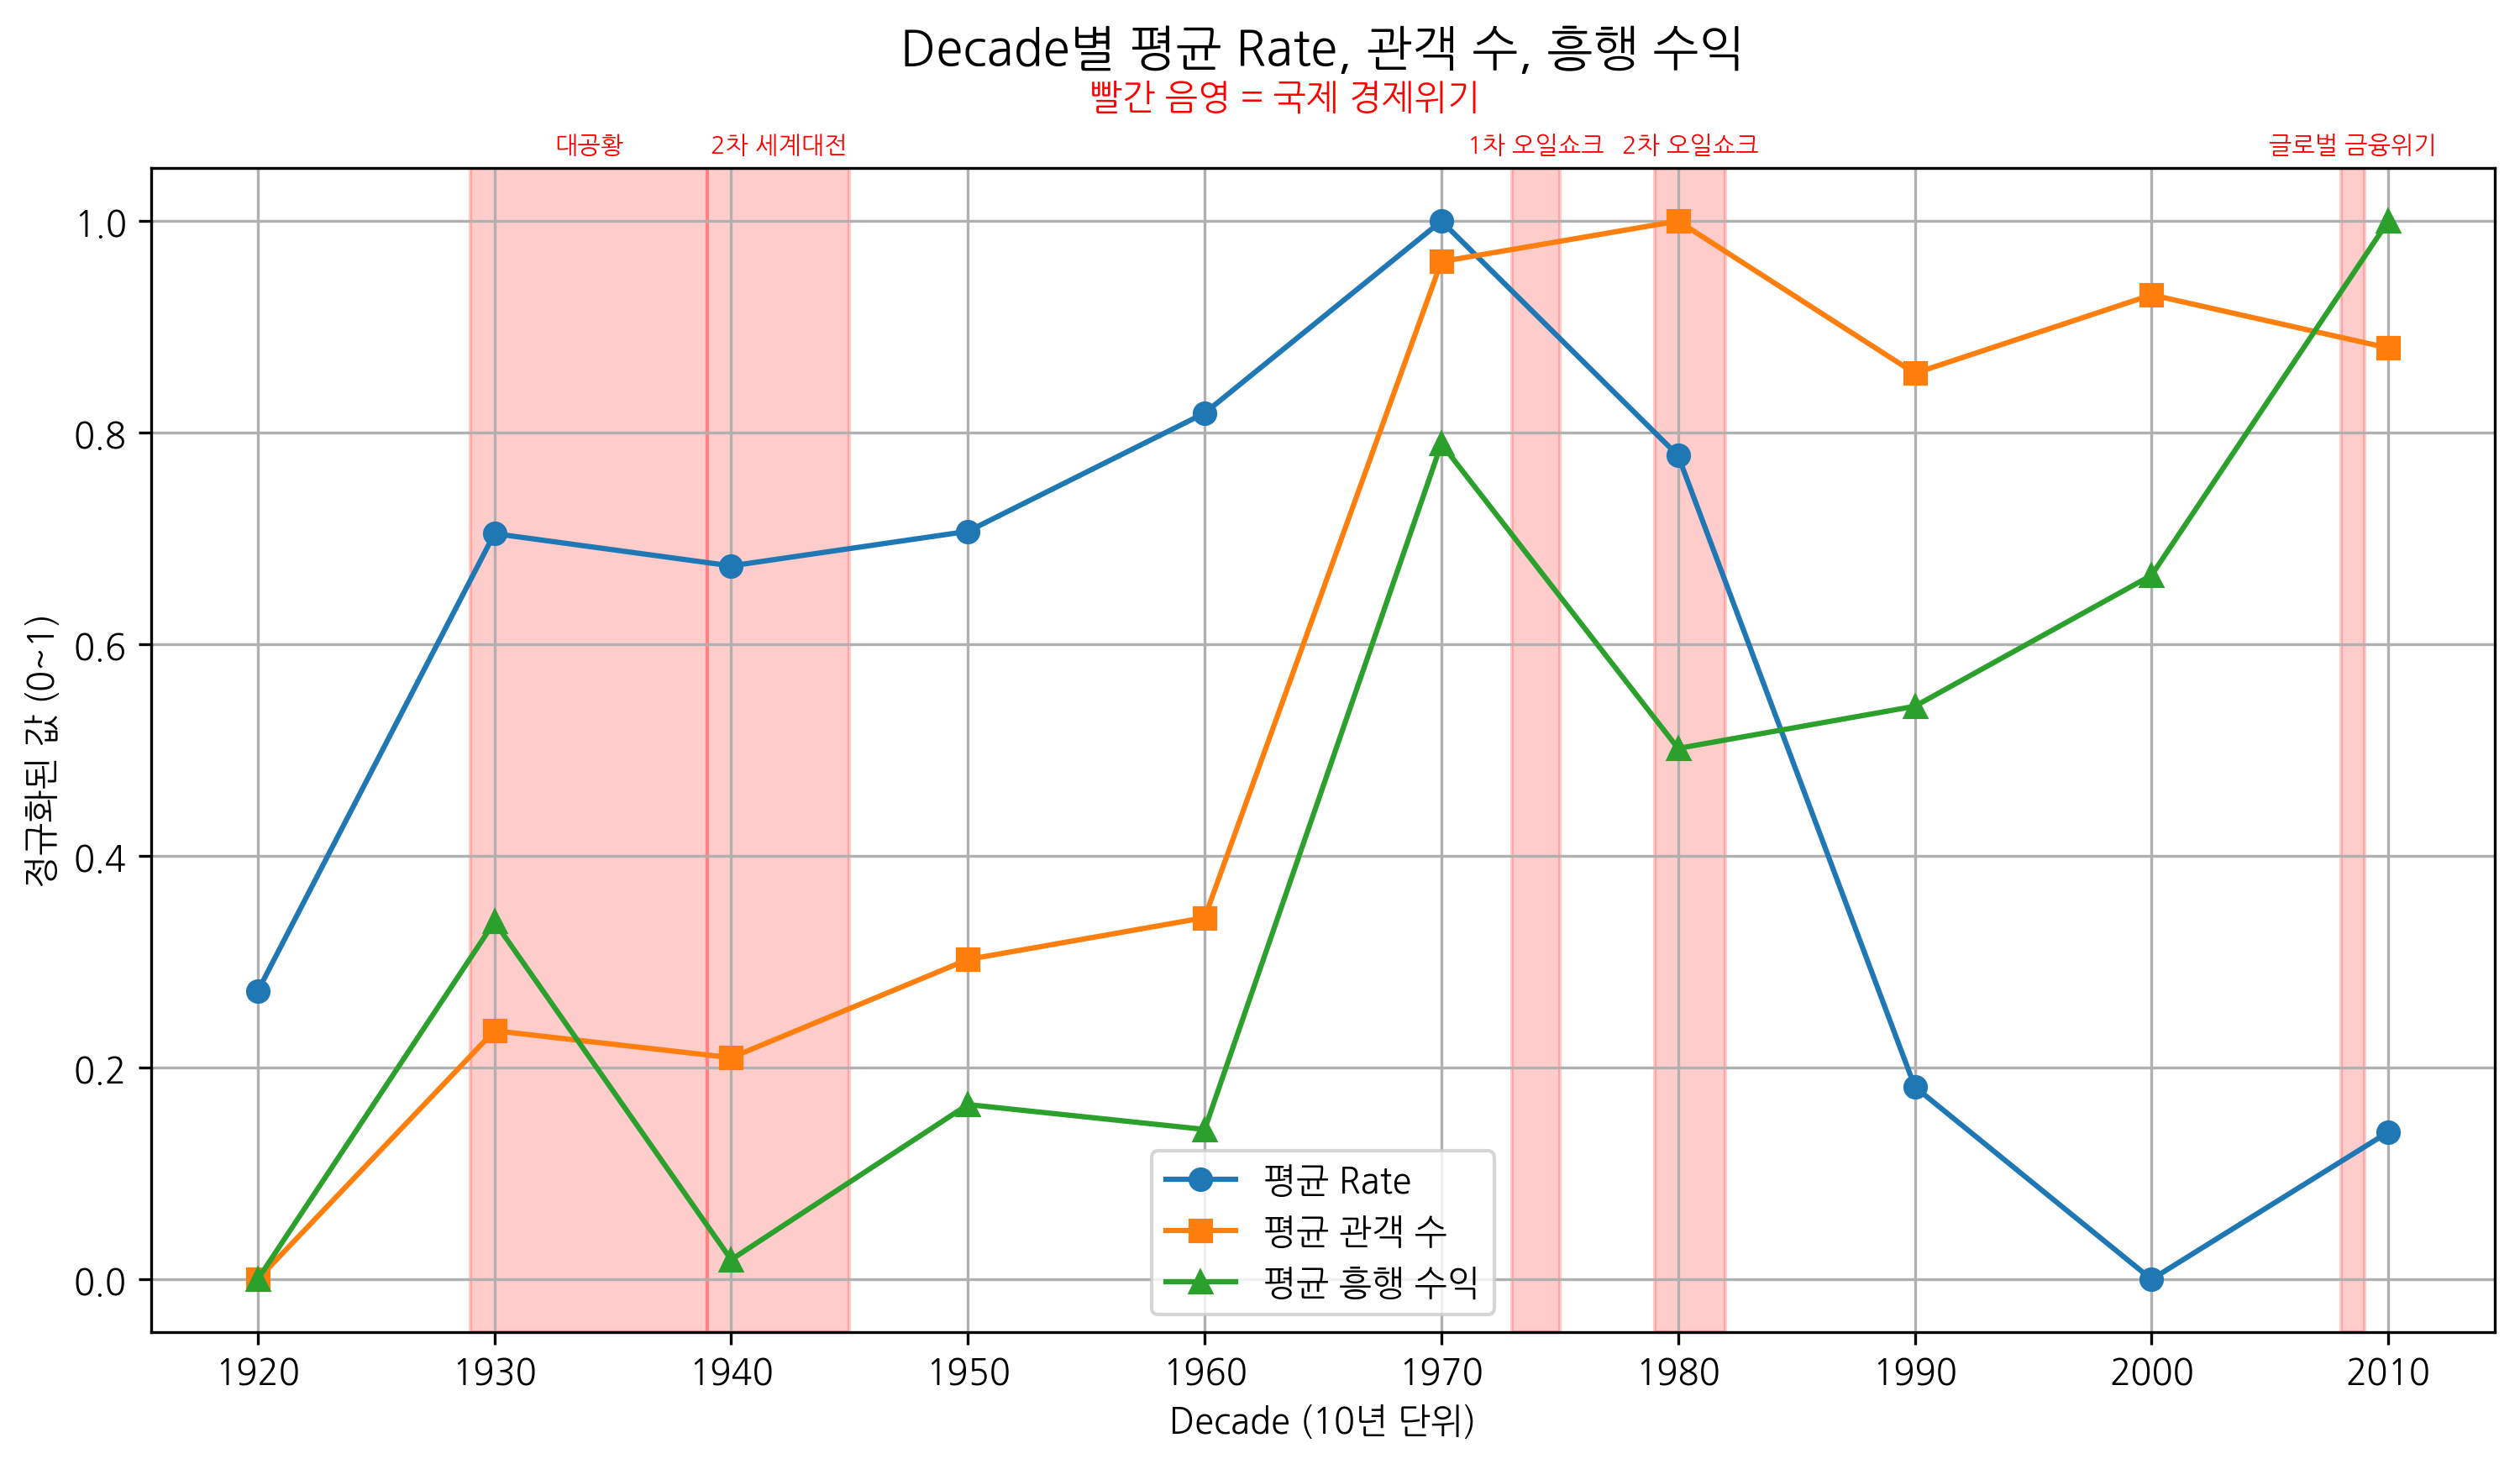

In [19]:
import matplotlib.pyplot as plt
import numpy as np

decade_avg["Rate_norm"] = minmax_norm(decade_avg["Avg_Rate"])
decade_avg["Audience_norm"] = minmax_norm(decade_avg["Avg_Audience"])
decade_avg["Gross_norm"] = minmax_norm(decade_avg["Avg_Gross"])

# 그래프
plt.figure(figsize=(12,6),dpi=300)
plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"], marker="o", label="평균 Rate")
plt.plot(decade_avg["Decade"], decade_avg["Audience_norm"], marker="s", label="평균 관객 수")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"], marker="^", label="평균 흥행 수익")

plt.xticks(np.arange(decade_avg["Decade"].min(), decade_avg["Decade"].max()+10, 10))
plt.title("Decade별 평균 Rate, 관객 수, 흥행 수익", fontsize=14, pad = 30)
plt.xlabel("Decade (10년 단위)")
plt.ylabel("정규화된 값 (0~1)")
plt.legend()
plt.grid(True)

# 📌 국제 경제위기 범위 (xmin, xmax, label)
crisis_ranges = [
    (1929, 1939, "대공황"),
    (1939, 1945, "2차 세계대전"),
    (1973, 1975, "1차 오일쇼크"),
    (1979, 1982, "2차 오일쇼크"),
    (2008, 2009, "글로벌 금융위기"),
]

# 범위 음영 추가
for xmin, xmax, label in crisis_ranges:
    plt.axvspan(xmin, xmax, color="red", alpha=0.2)
    plt.text((xmin+xmax)/2, 1.06, label, ha="center", va="bottom", color="red", fontsize=7)

plt.figtext(0.5, 0.92, "빨간 음영 = 국제 경제위기", ha="center", color="red", fontsize=10)

plt.show()


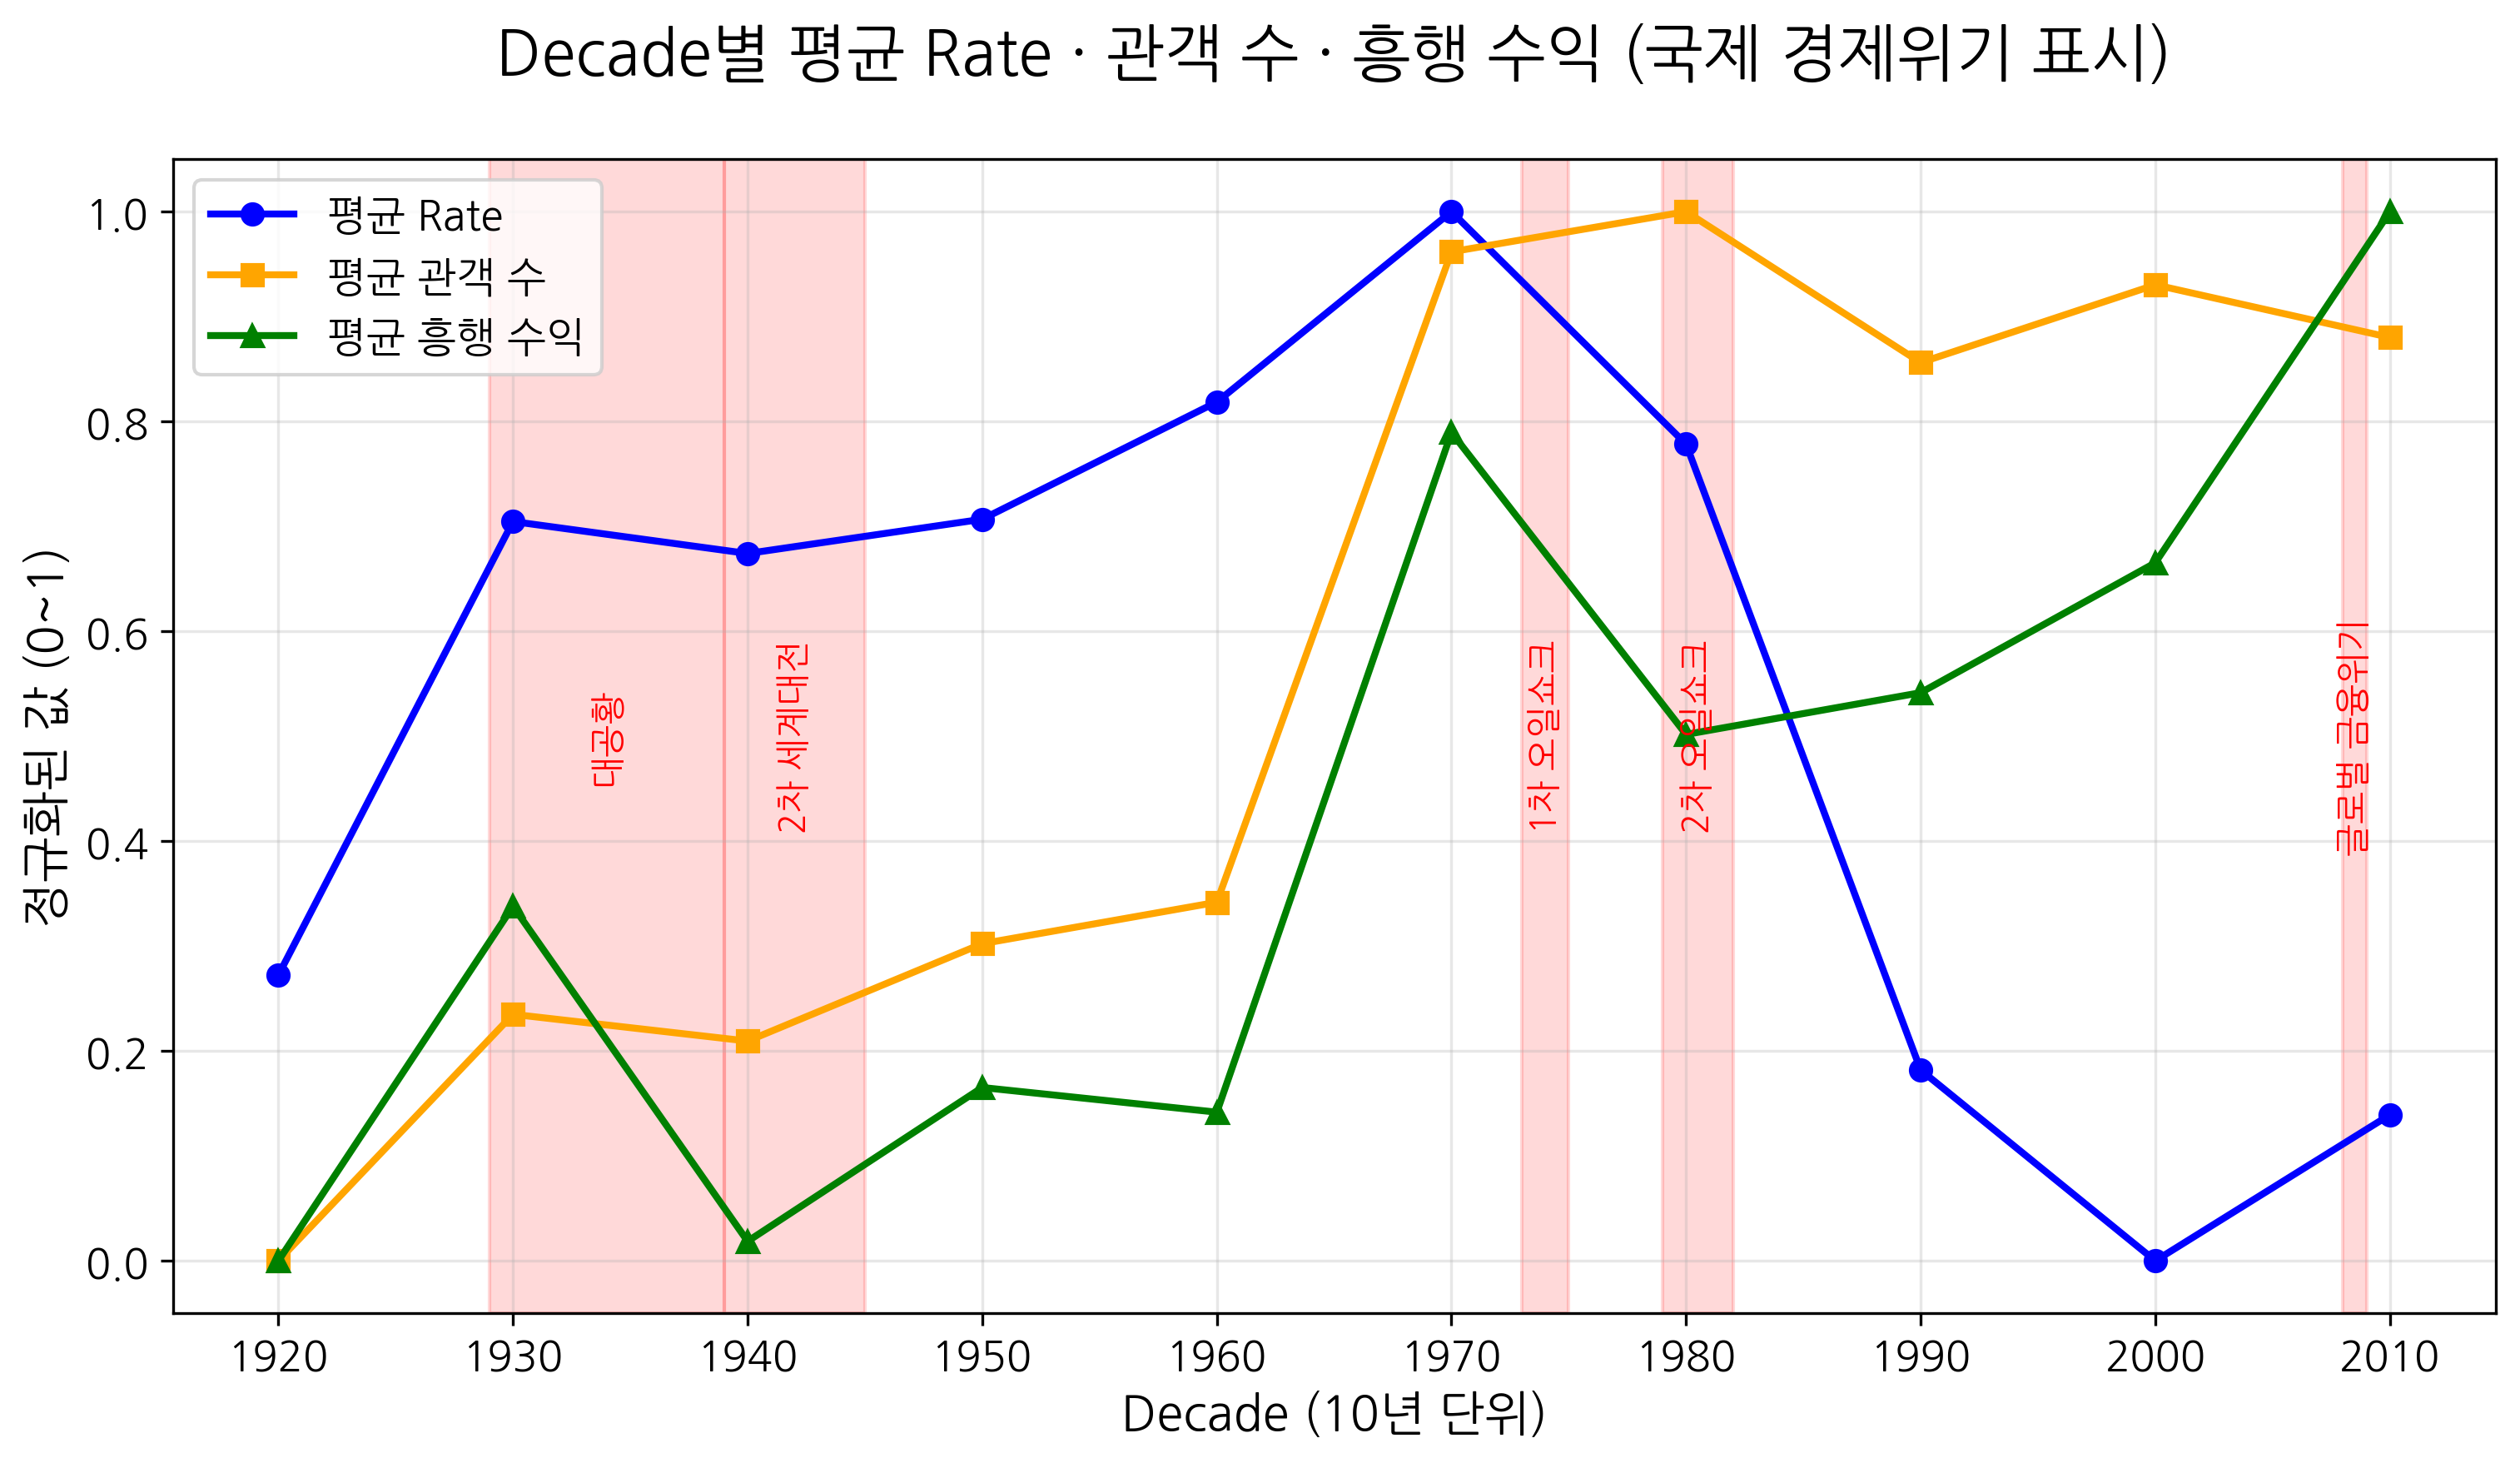

In [20]:
plt.figure(figsize=(12,6), dpi=300)

plt.plot(decade_avg["Decade"], decade_avg["Rate_norm"],
         marker="o", color="blue", linewidth=2, label="평균 Rate")
plt.plot(decade_avg["Decade"], decade_avg["Audience_norm"],
         marker="s", color="orange", linewidth=2, label="평균 관객 수")
plt.plot(decade_avg["Decade"], decade_avg["Gross_norm"],
         marker="^", color="green", linewidth=2, label="평균 흥행 수익")

plt.xticks(np.arange(decade_avg["Decade"].min(),
                     decade_avg["Decade"].max()+10, 10), fontsize=12)
plt.yticks(fontsize=12)

plt.title("Decade별 평균 Rate · 관객 수 · 흥행 수익 (국제 경제위기 표시)",
          fontsize=18, pad=25)
plt.xlabel("Decade (10년 단위)", fontsize=14)
plt.ylabel("정규화된 값 (0~1)", fontsize=14)
plt.grid(True, alpha=0.3)

# 경제위기 범위 음영 + 세로 라벨
for xmin, xmax, label in crisis_ranges:
    plt.axvspan(xmin, xmax, color="red", alpha=0.15)
    plt.text((xmin+xmax)/2, 0.5, label, ha="center", va="center",
             rotation=90, color="red", fontsize=10)

# 범례
plt.legend(fontsize=12, frameon=True, facecolor="white", loc="upper left")

# 저장
plt.savefig("decade_trends_presentation.png", dpi=300, bbox_inches="tight")
plt.show()


#### 2.시기별 장르별 평균 특성 시각화

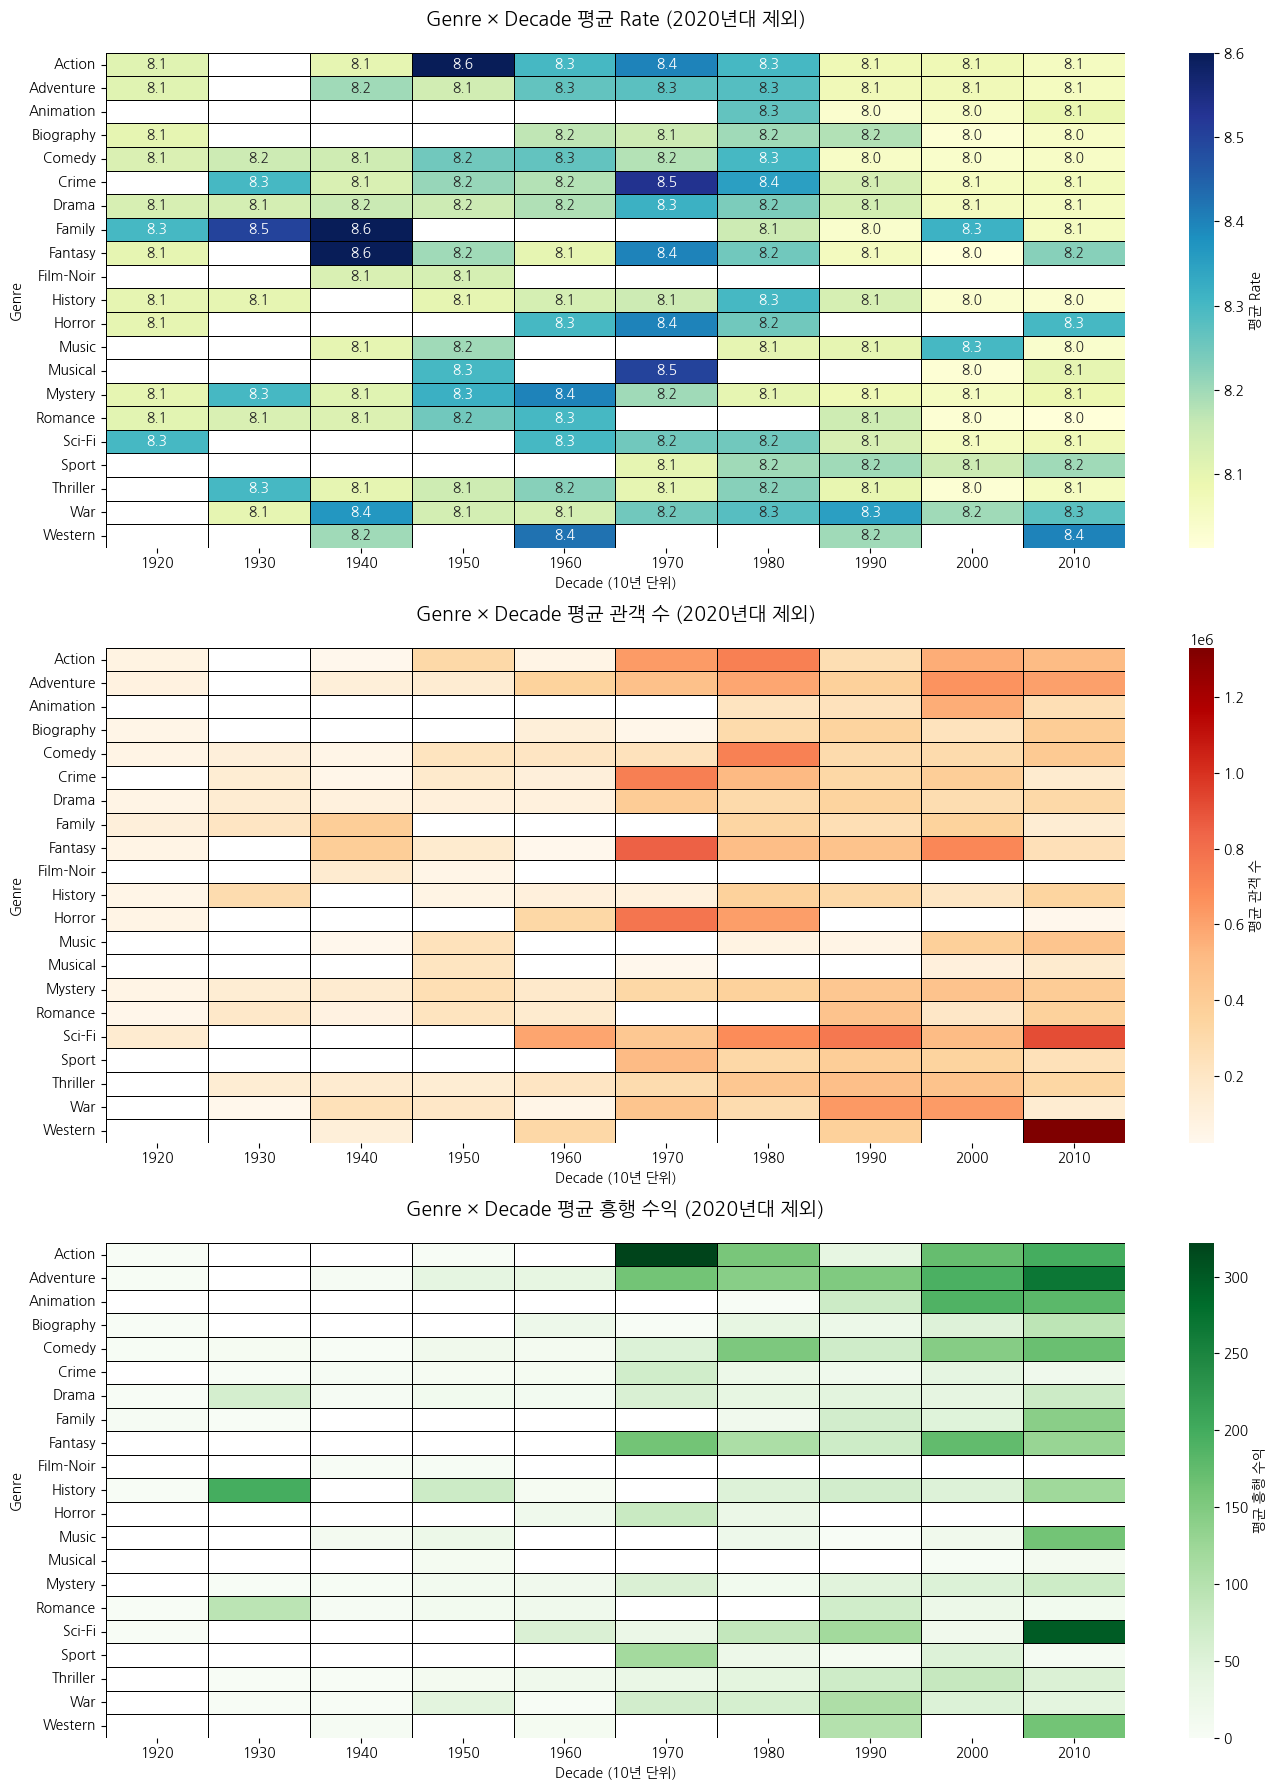

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2020년대 제외
result_filtered = result[result["Decade"] < 2020]

# Pivot 테이블 생성
pivot_rate = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Rate")
pivot_aud = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Audience")
pivot_gross = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Gross")

# Figure + Subplots
fig, axes = plt.subplots(3, 1, figsize=(14,18))

# 1) 평균 Rate 히트맵
sns.heatmap(pivot_rate, annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={'label': '평균 Rate'}, ax=axes[0],
            linewidths=0.5, linecolor="black")
axes[0].set_title("Genre × Decade 평균 Rate (2020년대 제외)", fontsize=14, pad=20)
axes[0].set_xlabel("Decade (10년 단위)")
axes[0].set_ylabel("Genre")

# 2) 평균 Audience 히트맵
sns.heatmap(pivot_aud, annot=False, cmap="OrRd",
            cbar_kws={'label': '평균 관객 수'}, ax=axes[1],
            linewidths=0.5, linecolor="black")
axes[1].set_title("Genre × Decade 평균 관객 수 (2020년대 제외)", fontsize=14, pad=20)
axes[1].set_xlabel("Decade (10년 단위)")
axes[1].set_ylabel("Genre")

# 3) 평균 Gross 히트맵
sns.heatmap(pivot_gross, annot=False, cmap="Greens",
            cbar_kws={'label': '평균 흥행 수익'}, ax=axes[2],
            linewidths=0.5, linecolor="black")
axes[2].set_title("Genre × Decade 평균 흥행 수익 (2020년대 제외)", fontsize=14, pad=20)
axes[2].set_xlabel("Decade (10년 단위)")
axes[2].set_ylabel("Genre")

plt.tight_layout()
plt.show()


In [22]:
display(result_filtered['Genre'].unique())
print(f'특성 개수 확인: {len(result_filtered['Genre'].unique())}')

array(['Action', 'Adventure', 'Biography', 'Comedy', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Crime', 'Thriller', 'War', 'Film-Noir', 'Music', 'Western',
       'Musical', 'Sport', 'Animation'], dtype=object)

특성 개수 확인: 21


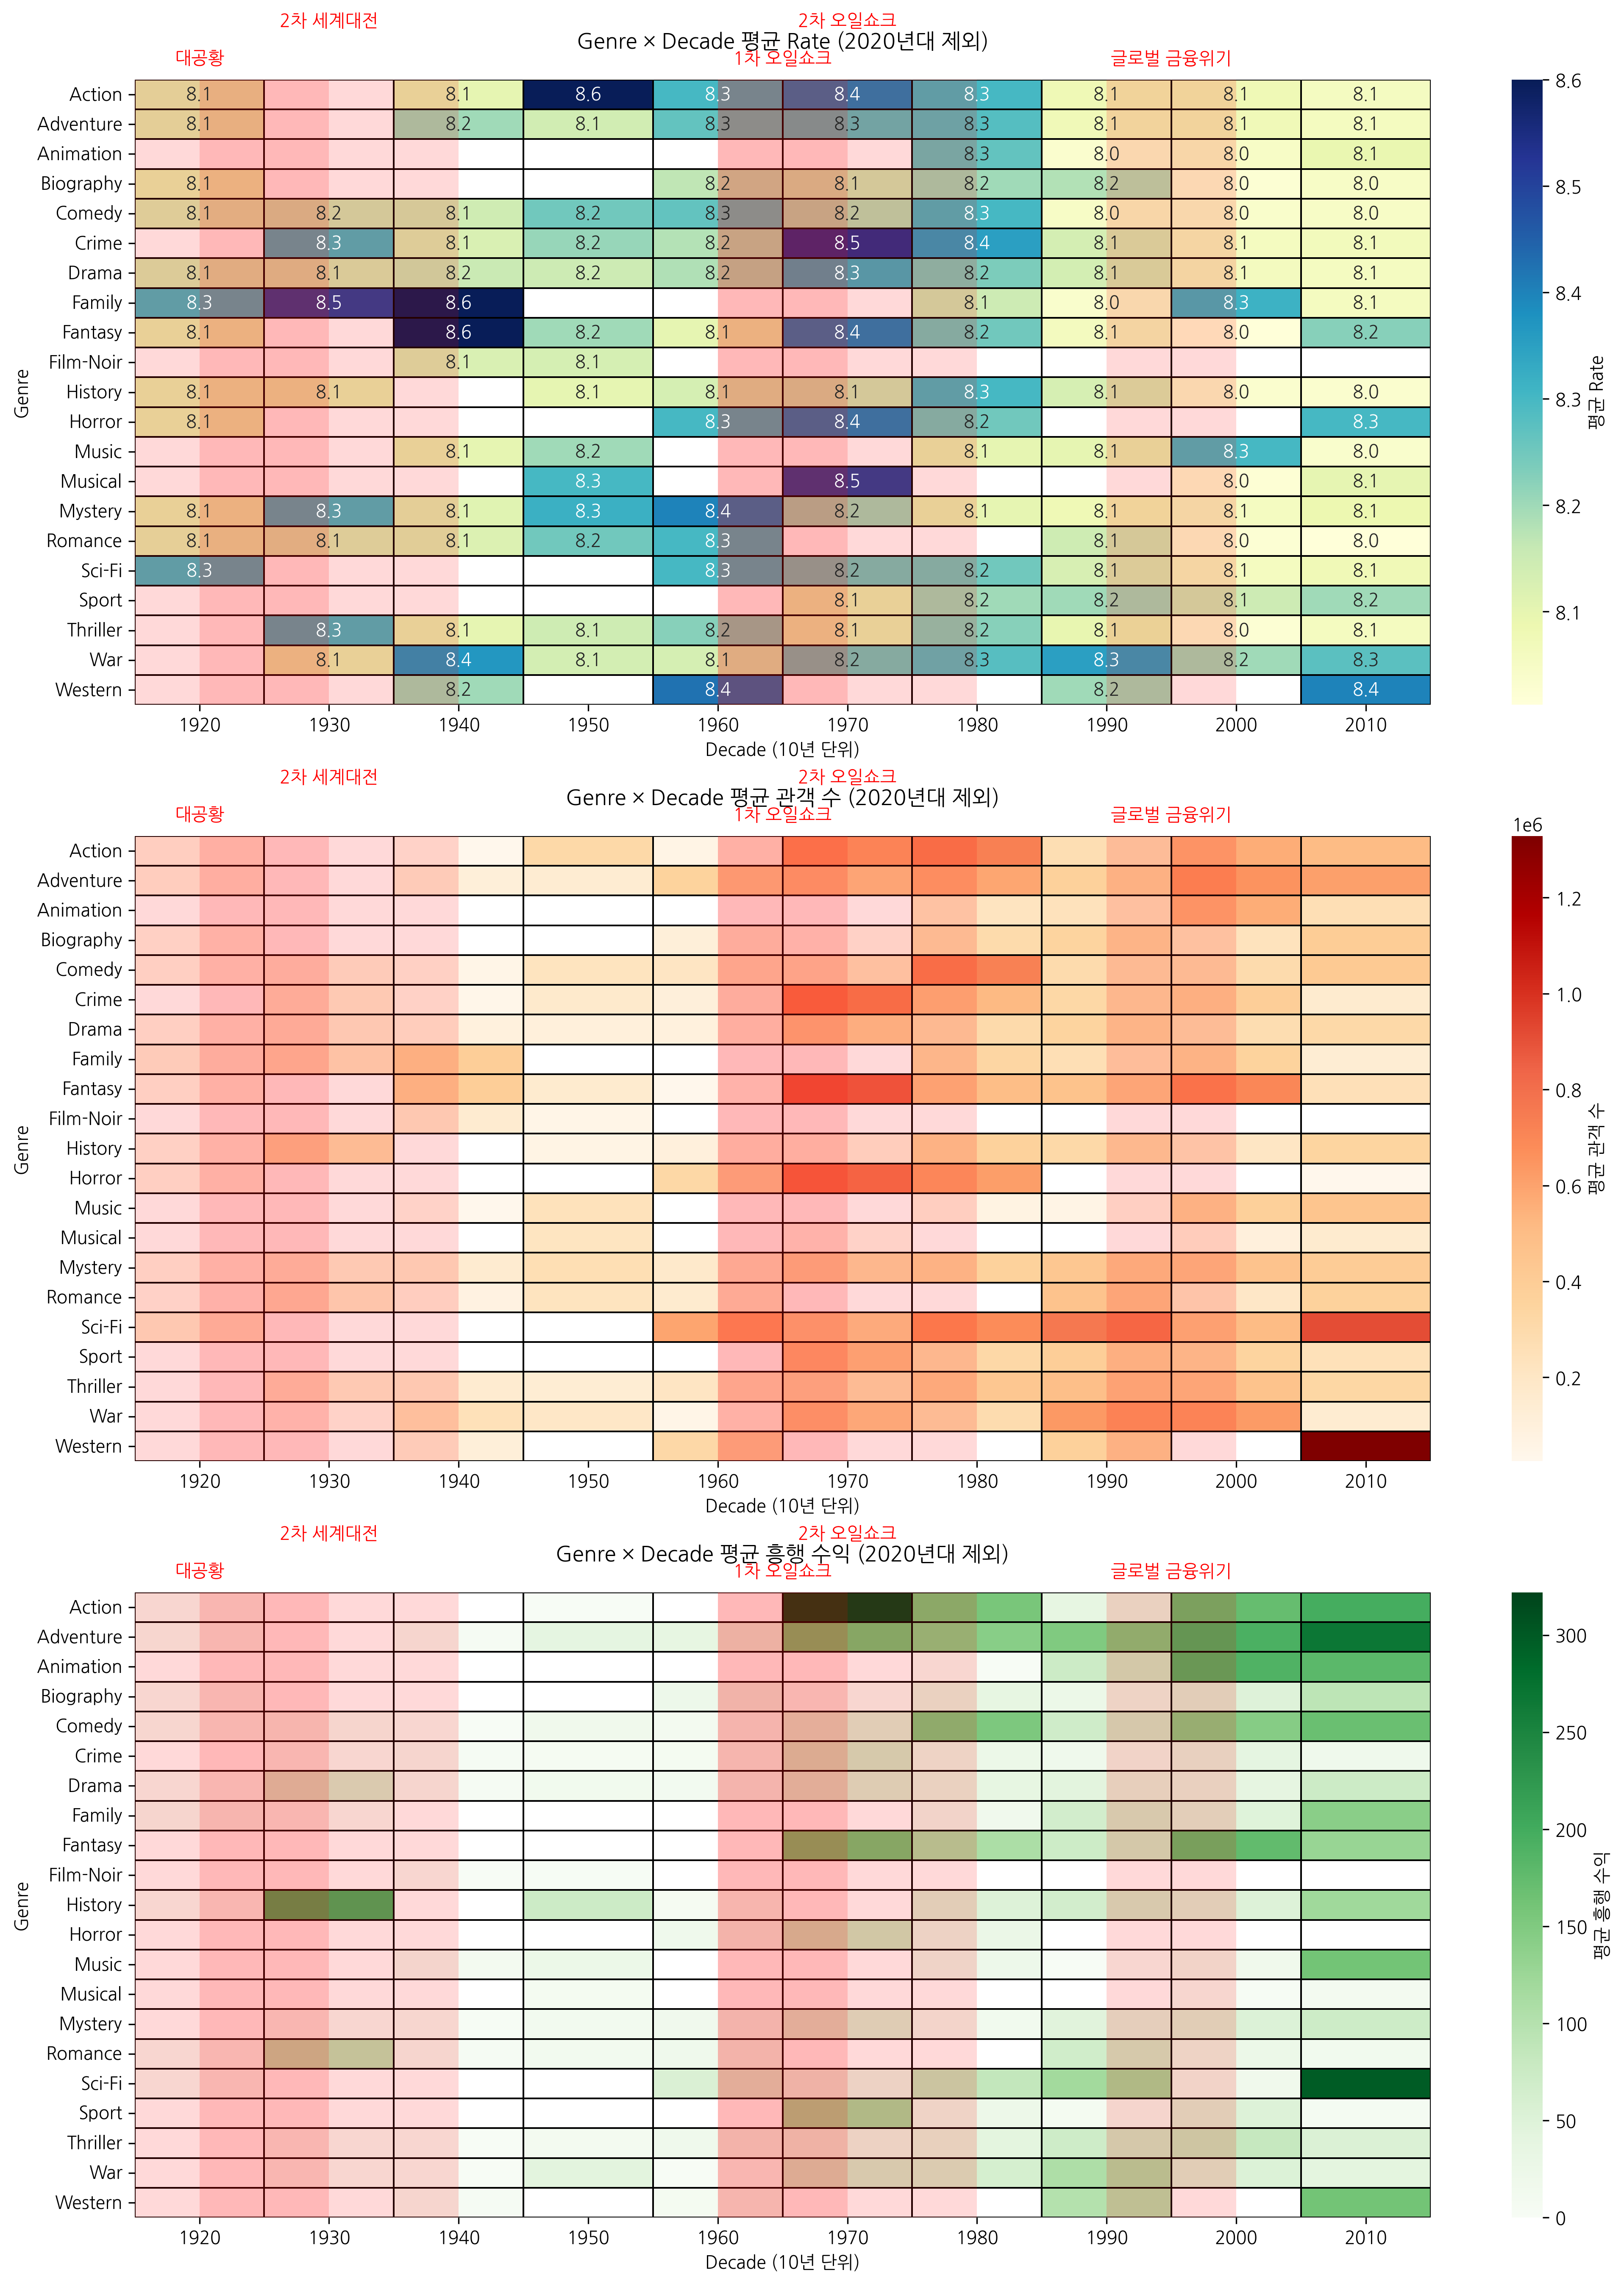

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1) 2020년대 제외
result_filtered = result[result["Decade"] < 2020].copy()

# 2) 피벗(행=Genre, 열=Decade)
p_rate  = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Rate")
p_aud   = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Audience")
p_gross = result_filtered.pivot(index="Genre", columns="Decade", values="Avg_Gross")

# 3) 경제위기 범위 정의 (시작연도, 끝연도, 라벨)
crises = [
    (1929, 1939, "대공황"),
    (1939, 1945, "2차 세계대전"),
    (1973, 1975, "1차 오일쇼크"),
    (1979, 1982, "2차 오일쇼크"),
    (2008, 2009, "글로벌 금융위기"),
]

# 4) 히트맵 위에 경제위기 범위를 칠하는 함수
def shade_crises_on_heatmap(ax, columns, crises, color="red", alpha=0.15, stagger=True):
    cols = list(columns)                  # 예: [1920, 1930, ... , 2010]
    for i, (start, end, label) in enumerate(crises):
        # 위기 구간이 겹치는 'Decade' 열들 선택
        decades = np.arange((start//10)*10, (end//10)*10 + 1, 10)
        idxs = [cols.index(d) for d in decades if d in cols]
        if not idxs:
            continue
        i0, i1 = min(idxs), max(idxs)
        # 열 경계는 -0.5 ~ n-0.5 이므로, 해당 구간을 음영 처리
        ax.axvspan(i0-0.5, i1+0.5, color=color, alpha=alpha, lw=0)
        # 라벨은 x축 변환(데이터=가로, y=축비율) 좌표로 위쪽에 배치
        y = 1.02 + (0.06 if (stagger and i % 2) else 0.0)  # 번갈아 위로 띄워 겹침 방지
        x = (i0 + i1) / 2
        ax.text(x, y, label, transform=ax.get_xaxis_transform(),
                ha="center", va="bottom", fontsize=10, color=color)

# 5) 한 Figure에 3개 서브플롯
fig, axes = plt.subplots(3, 1, figsize=(14, 18), dpi=300)

sns.heatmap(p_rate,  annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={'label': '평균 Rate'},  linewidths=0.5, linecolor="black", ax=axes[0])
axes[0].set_title("Genre × Decade 평균 Rate (2020년대 제외)", pad=18)
axes[0].set_xlabel("Decade (10년 단위)"); axes[0].set_ylabel("Genre")
shade_crises_on_heatmap(axes[0], p_rate.columns, crises)

sns.heatmap(p_aud,   annot=False,          cmap="OrRd",
            cbar_kws={'label': '평균 관객 수'}, linewidths=0.5, linecolor="black", ax=axes[1])
axes[1].set_title("Genre × Decade 평균 관객 수 (2020년대 제외)", pad=18)
axes[1].set_xlabel("Decade (10년 단위)"); axes[1].set_ylabel("Genre")
shade_crises_on_heatmap(axes[1], p_aud.columns, crises)

sns.heatmap(p_gross, annot=False,          cmap="Greens",
            cbar_kws={'label': '평균 흥행 수익'}, linewidths=0.5, linecolor="black", ax=axes[2])
axes[2].set_title("Genre × Decade 평균 흥행 수익 (2020년대 제외)", pad=18)
axes[2].set_xlabel("Decade (10년 단위)"); axes[2].set_ylabel("Genre")
shade_crises_on_heatmap(axes[2], p_gross.columns, crises)

plt.tight_layout()
plt.show()
